## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**FEATURES:**

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
ds=pd.read_excel('Data_Train.xlsx')
df_train=pd.DataFrame(ds)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
ds=pd.read_excel('Test_set.xlsx')
df_test=pd.DataFrame(ds)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## Analysis of Data

In [4]:
df_train.shape, df_test.shape

((10683, 11), (2671, 10))

- There are 11 features including 1 target feature (Price) and 10683 observations in train dataset.
- There are 10 input features and 2671 observations in test dataset.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB


In [7]:
df=df_train.append(df_test,sort=False)
df.shape

(13354, 11)

In [8]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

All the input variables are categorical. We will be converting it into numerical variables.

In [9]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354,10683.000000
unique,12,44,5,6,132,223,1451,374,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,4746,633,5682,5682,3000,288,536,672,7056,10493,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


- We can see that there are 12 unique airlines.
- There are 5 unique source stations and 6 unique destination stations.
- There are 5 different stop possibilities i.e. 0, 1,2,3 and 4 stops. 1 is the most common of all.
- In additional info, majority of the values are 'No info' indicating there is no additional information available.

## Checking Missing Data

In [10]:
print("Missing in our dataset: ")
display(df.isnull().sum())

Missing in our dataset: 


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

There is 1 missing value in Route and 1 missing value in Total_Stops. There are missing values in Price as well but that is expected for testing dataset.

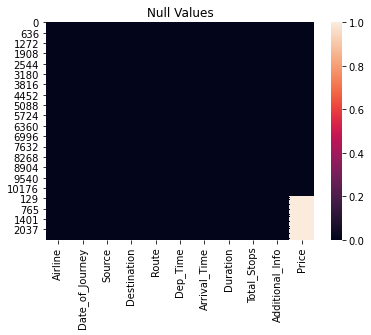

In [11]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [12]:
df.loc[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


We can see the observation with Nan values. Lets drop it as we have only one observation with Nan values.

In [13]:
df=df.drop(9039)
df.shape

(13353, 11)

We have deleted one row with null values.

In [14]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

There are no null values left in the dataset now.

## Feature Engineering

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [16]:
df['DOJ_Date']=pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df['DOJ_Month']=pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df['DOJ_Year']=pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Date,DOJ_Month,DOJ_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


Now we have converted date of journey into numerics, so we can drop it as we will not be considering it in model.

In [18]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
# Extracting Hours from Arrival Time
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Minutes from Arrival Time
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
# Extracting Hours from Arrival Time
df["Dep_hour"] = pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Arrival Time
df["Dep_min"] = pd.to_datetime(df['Dep_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
#Handling Route column
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]

#drop Route column as it is of no use now
df.drop('Route', axis=1, inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,DOJ_Date,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [23]:
# function to extract seconds from duration

def clean_data(duration):
    if 'm' in duration:
        duration=duration
    else:
        duration=duration+' 0m'
    return duration
        
def get_seconds(duration):
    duration=duration.replace('h',':')
    duration=duration.replace('m','')
    h, m = duration.split(':')
    return int(h) * 3600 + int(m) * 60
    

In [24]:
import re
def convert_into_seconds(X):
    '''
    This function takes the total time of flight from
    one city to another and converts it into the seconds.
    '''
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration_seconds'] = df['Duration'].map(convert_into_seconds)

In [25]:
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DOJ_Date,DOJ_Month,DOJ_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_seconds
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,10200
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,26700
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,68400
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,19500
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,17100


## Handling Categorical Data

In [26]:
df["Airline"].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops          object
Additional_Info      object
Price               float64
DOJ_Date              int64
DOJ_Month             int64
DOJ_Year              int64
Arrival_hour          int64
Arrival_min           int64
Dep_hour              int64
Dep_min               int64
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Duration_seconds      int64
dtype: object

In [28]:
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

## Plotting of Data

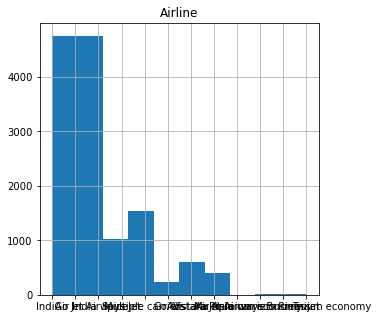

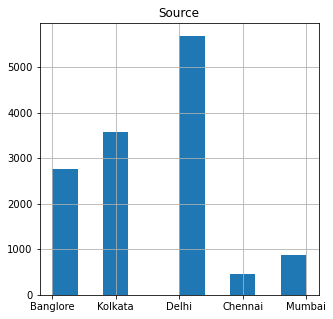

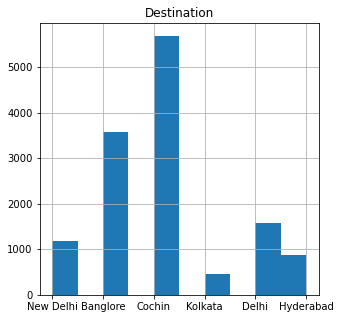

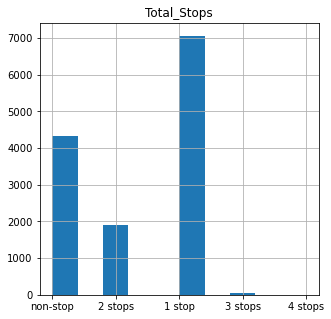

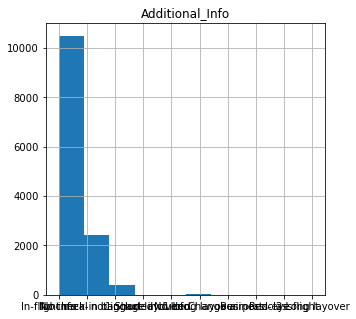

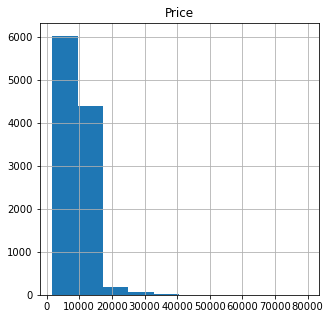

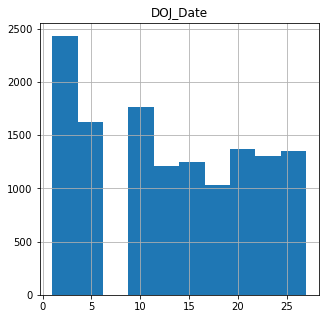

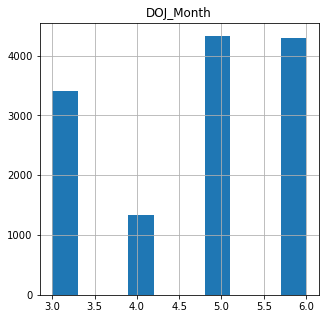

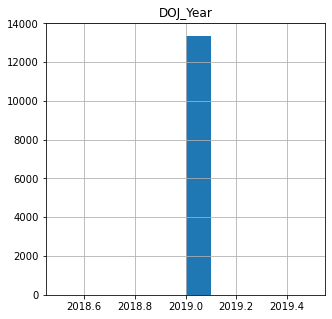

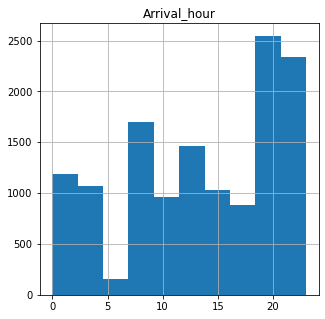

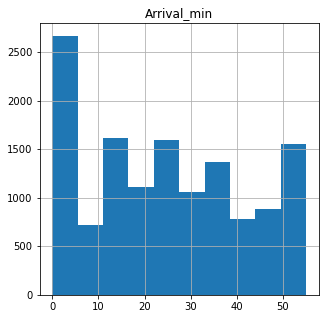

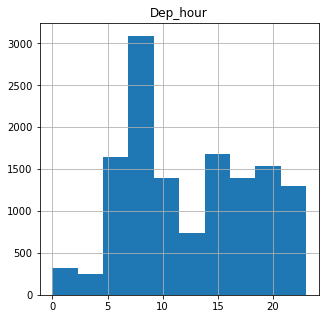

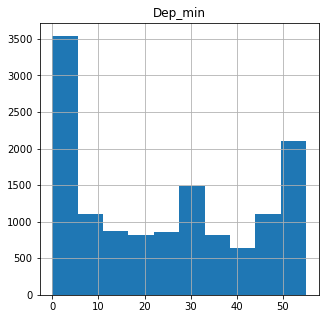

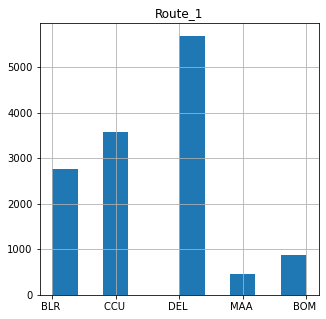

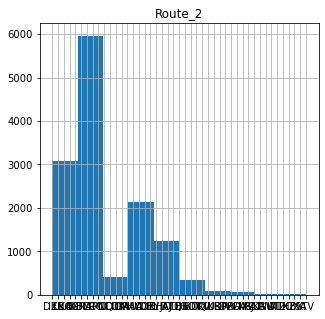

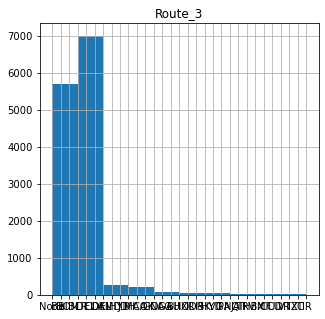

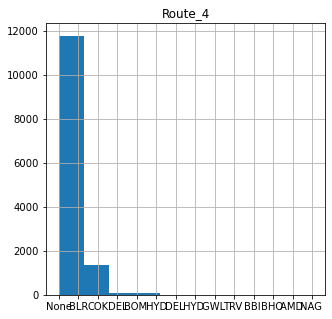

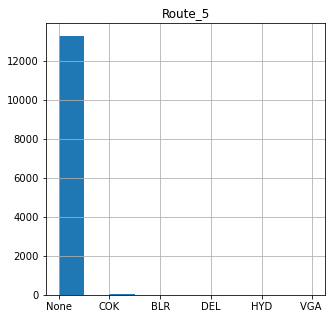

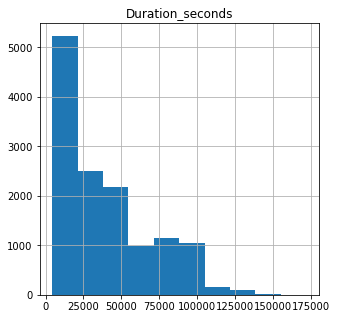

In [29]:
for i in df.columns:
    plt.figure()
    df[i].hist(figsize=(5,5))
    plt.title(i)
    plt.show()


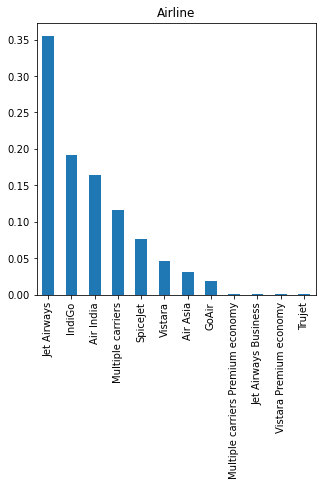

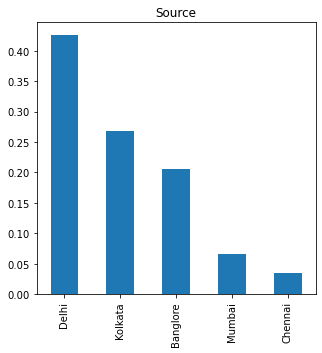

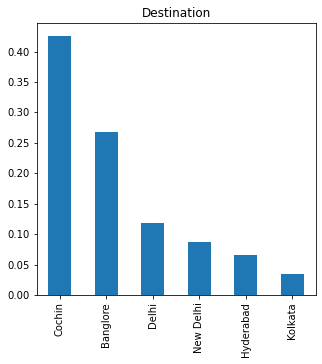

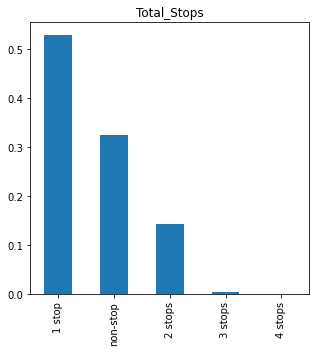

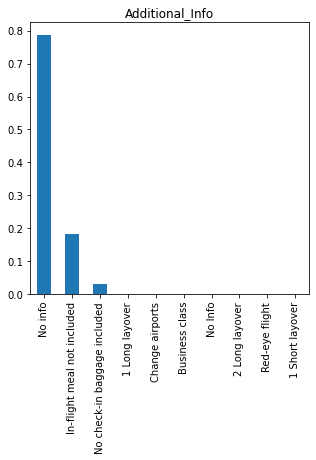

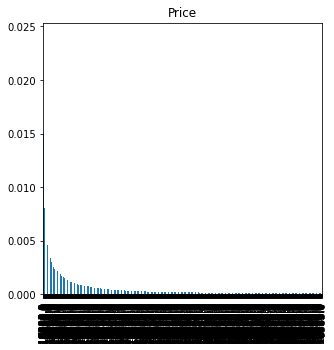

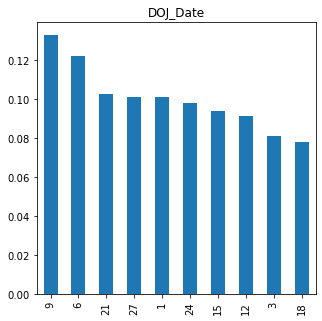

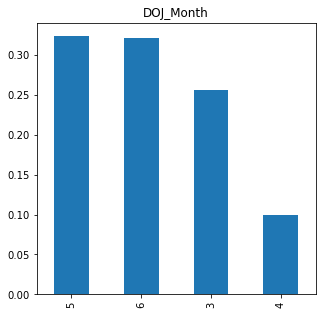

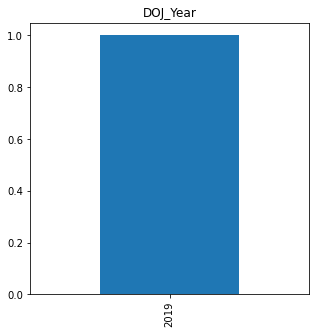

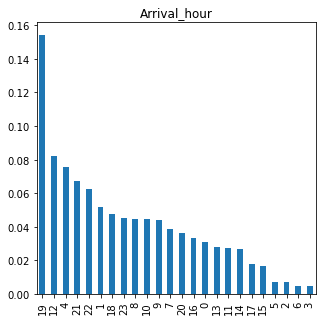

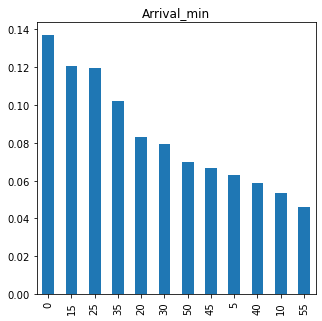

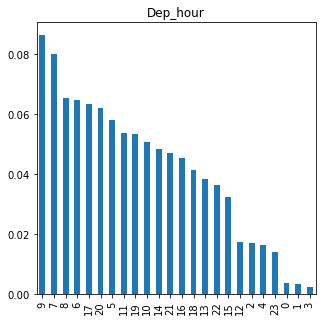

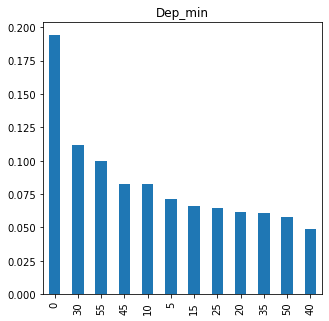

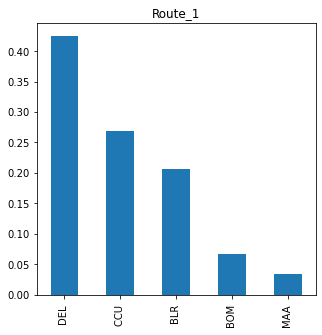

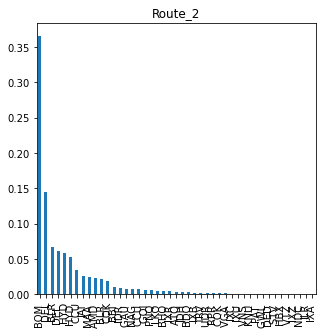

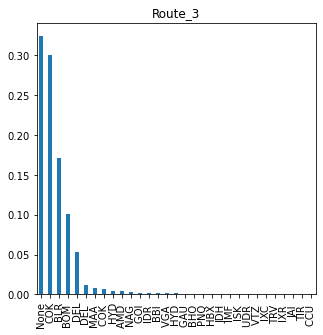

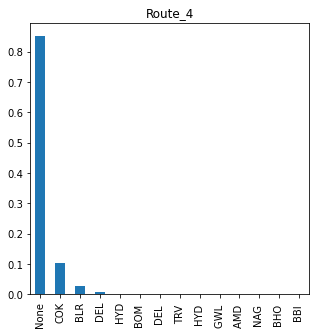

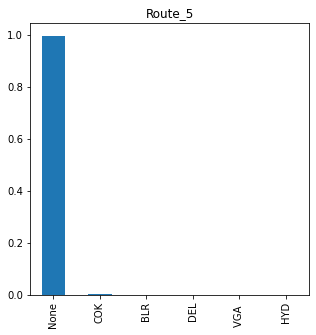

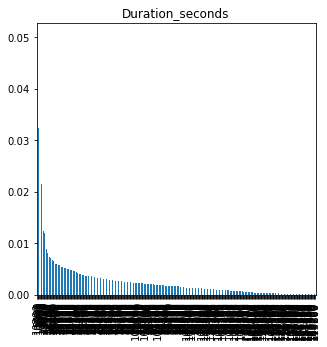

In [30]:
for i in df.columns:
    plt.figure()
    df[i].value_counts(normalize=True).plot.bar(figsize=(5,5),title=i)

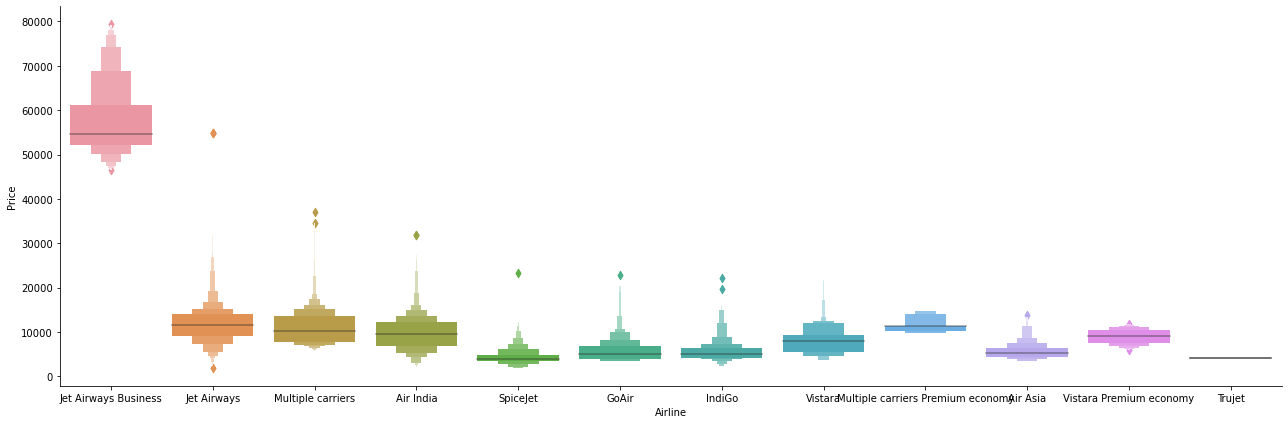

In [31]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

- Jet Airways Business have the highest prices always.
- All other airlines have almost same medians.

In [32]:
df['DOJ_Month'].value_counts()

5    4328
6    4286
3    3412
4    1327
Name: DOJ_Month, dtype: int64

Text(0, 0.5, 'Count of flights')

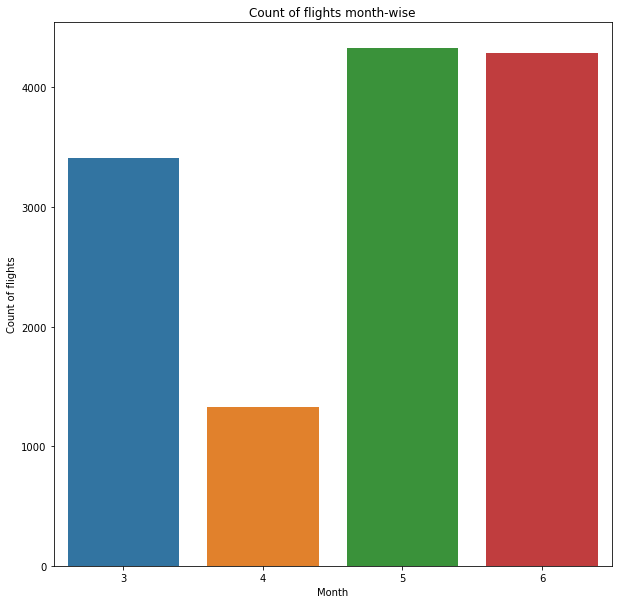

In [33]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month-wise')
sns.countplot(x = 'DOJ_Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

- There are maximum number of flights booked for the month of May. So this seems to be the peak period for airlines.
- The number of flights booked for June month are also high and stands at second highest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

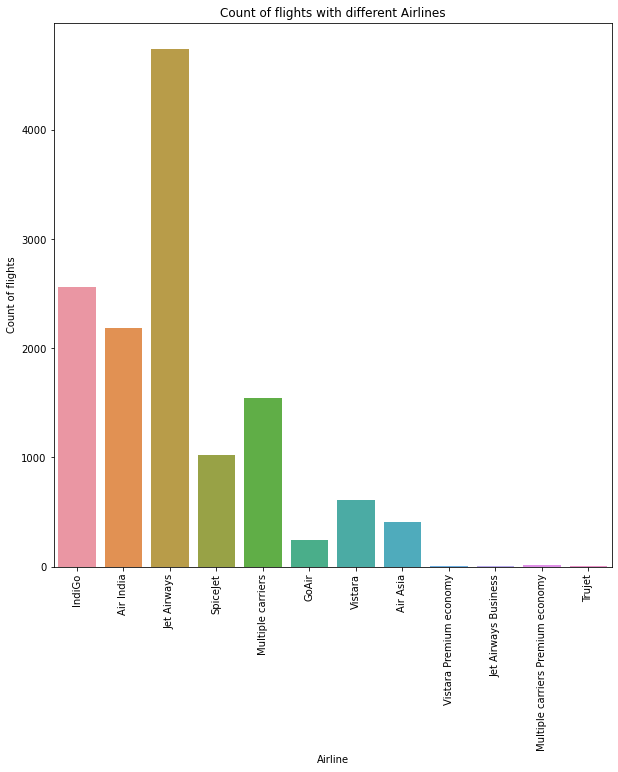

In [34]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

- The maximum no of flights are booked for Jet Airways.
- The second and third highest bookings are for Indigo and Air India respectively.

Text(0, 0.5, 'Price of ticket')

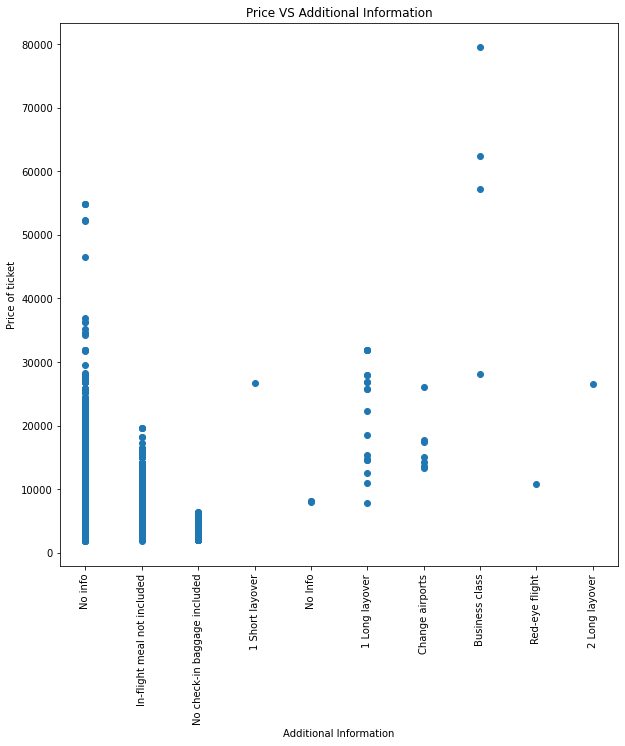

In [35]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Additional Information')
plt.ylabel('Price of ticket')

- Business class has highest fares, which was expected.

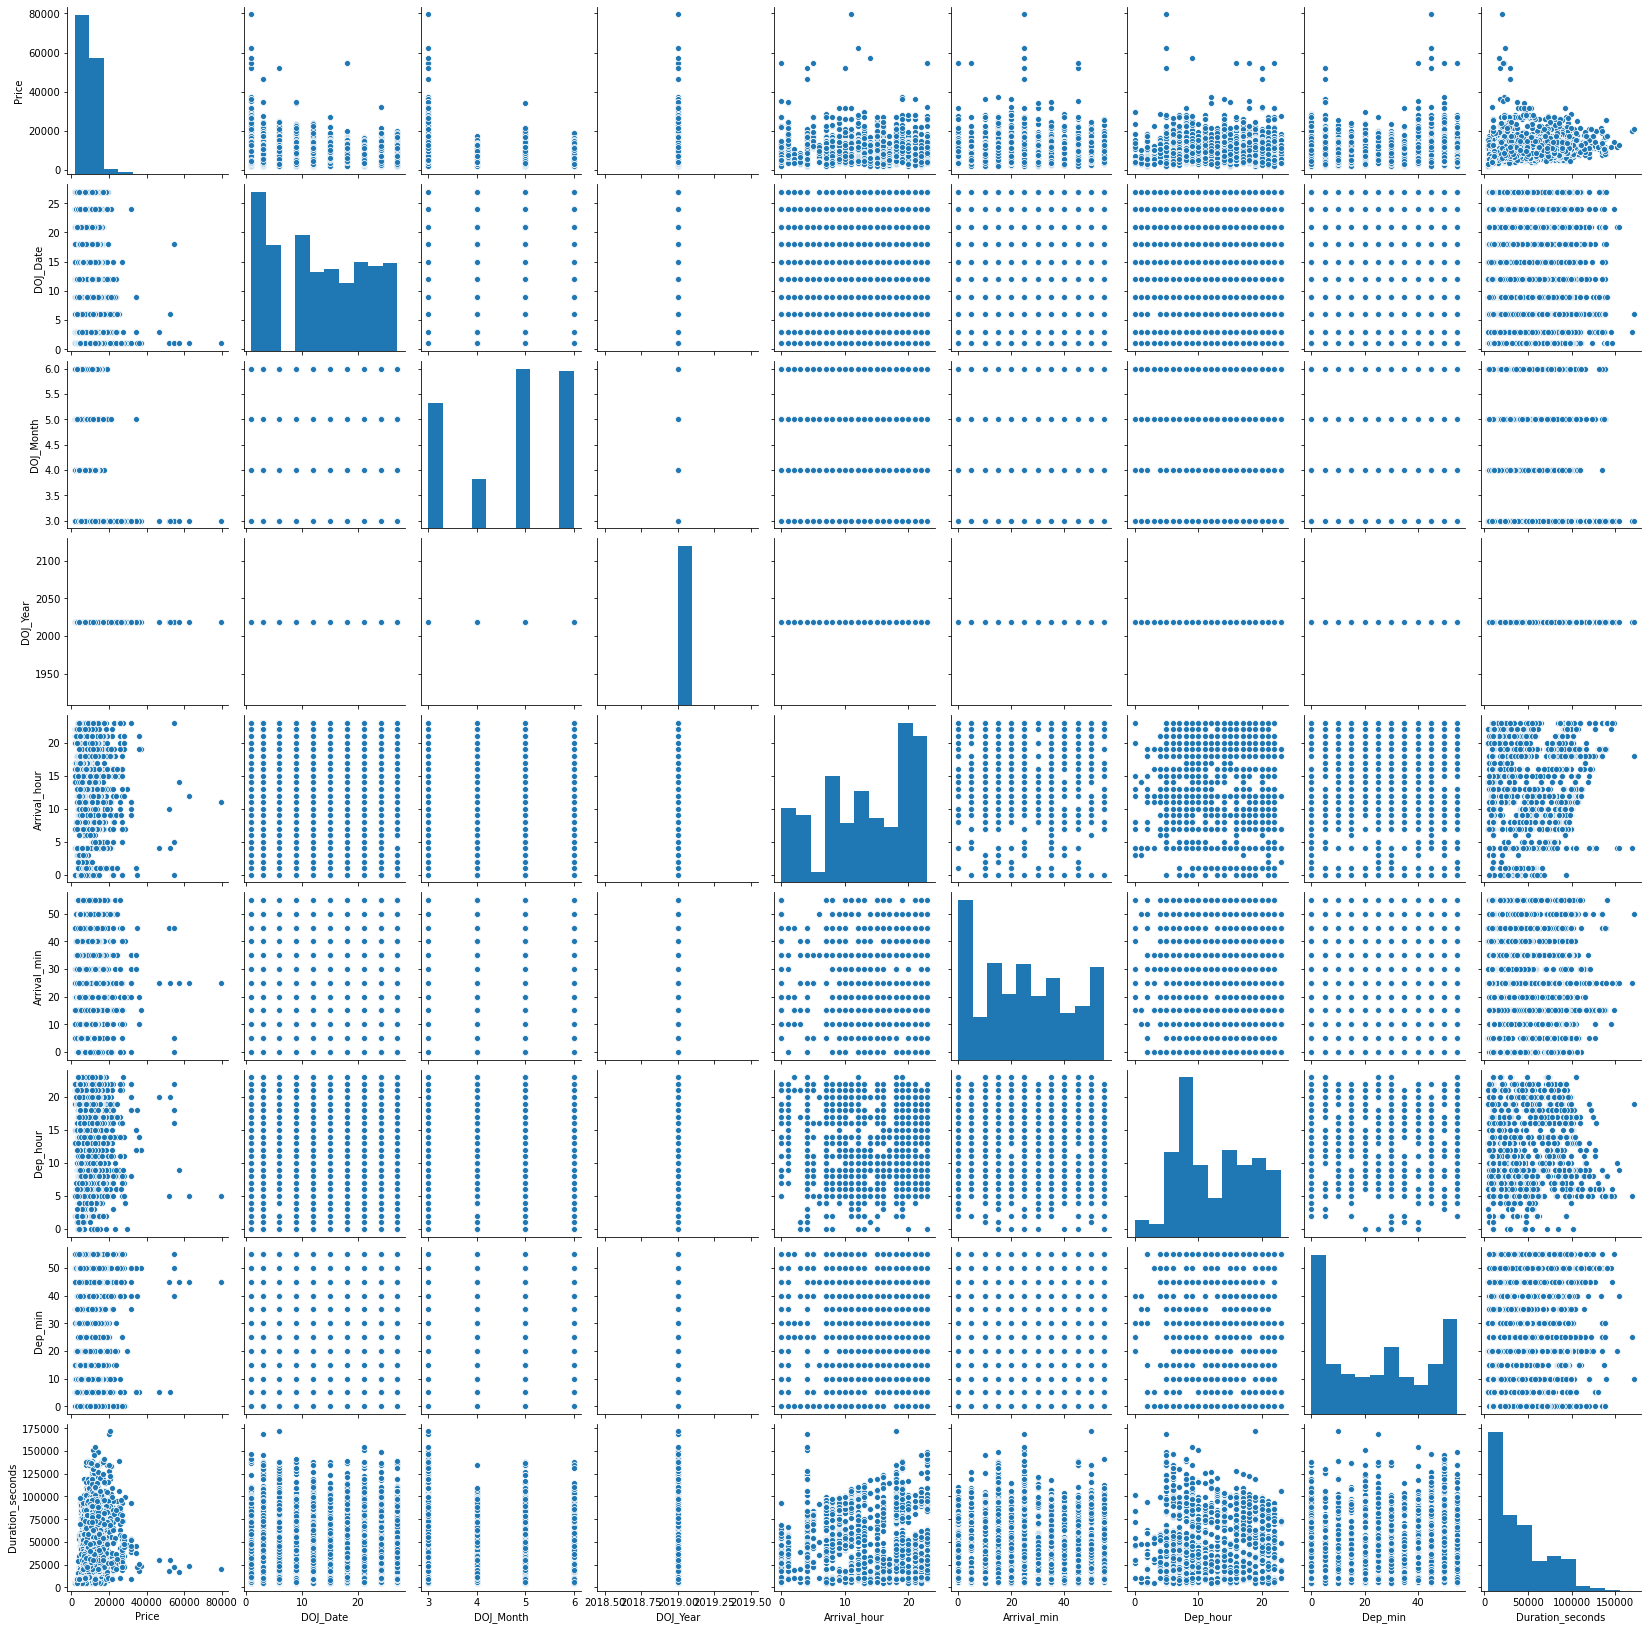

In [36]:
sns.pairplot(df)

In [37]:
df_cat=df.select_dtypes(include='object')
df_cat

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,No info,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,1 stop,No info,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,1 stop,No info,DEL,BOM,COK,None,None


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat.columns:
    df[i]=le.fit_transform(df[i])

In [39]:
df.dtypes

Airline               int32
Source                int32
Destination           int32
Total_Stops           int32
Additional_Info       int32
Price               float64
DOJ_Date              int64
DOJ_Month             int64
DOJ_Year              int64
Arrival_hour          int64
Arrival_min           int64
Dep_hour              int64
Dep_min               int64
Route_1               int32
Route_2               int32
Route_3               int32
Route_4               int32
Route_5               int32
Duration_seconds      int64
dtype: object

In [40]:
# Lets drop DOJ_Year as this column has only 1 value 2019, this is 2019 dataset.
df.drop('DOJ_Year',axis=1,inplace=True)

**Checking Correlation**

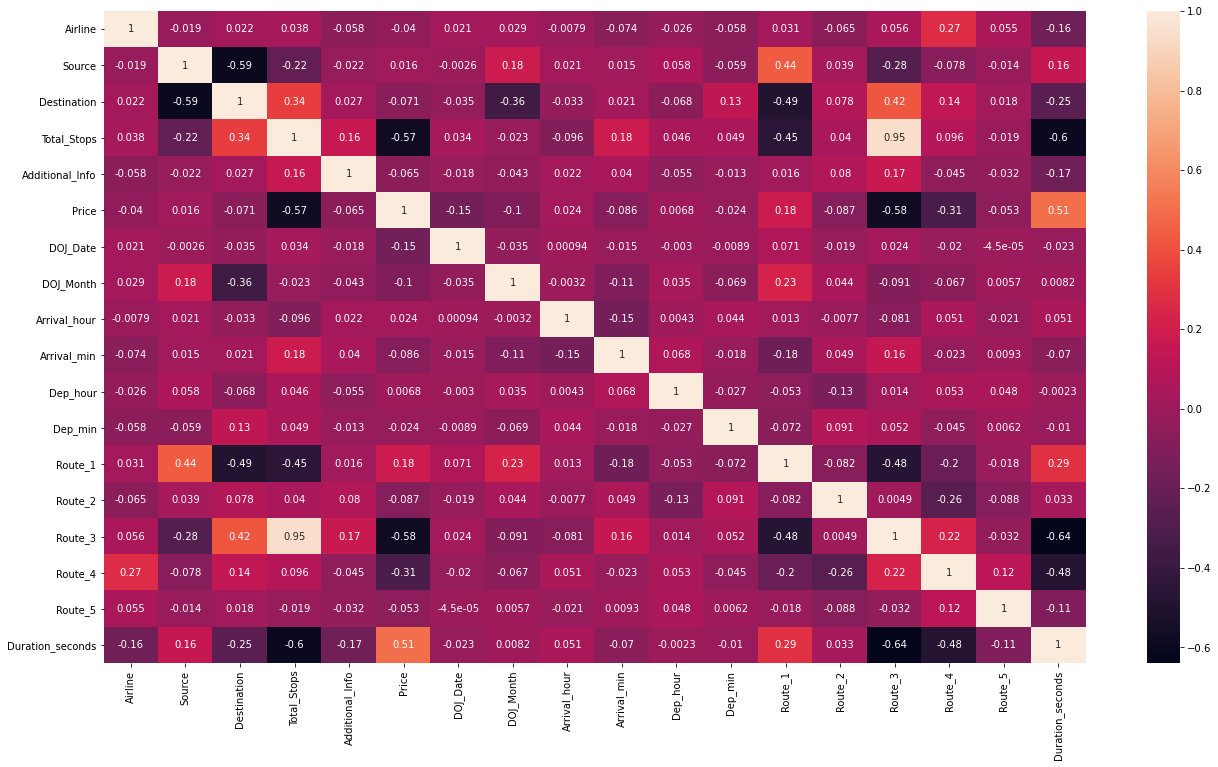

In [41]:
corr_mat=df.corr()
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [42]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price               1.000000
Duration_seconds    0.506604
Route_1             0.182169
Arrival_hour        0.024244
Source              0.015999
Dep_hour            0.006799
Dep_min            -0.024458
Airline            -0.039565
Route_5            -0.053100
Additional_Info    -0.065463
Destination        -0.071122
Arrival_min        -0.086155
Route_2            -0.087240
DOJ_Month          -0.103643
DOJ_Date           -0.153774
Route_4            -0.314790
Total_Stops        -0.571221
Route_3            -0.579145
Name: Price, dtype: float64

- POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. We can see some variables have positive correlation with the target variable.

- NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation. We can see some variables have negative correlation with the target variable

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

- Total_Stops and Duration are most closely related with the target variable.

**Outliers**

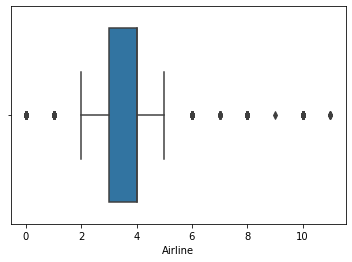

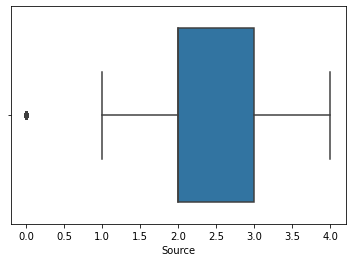

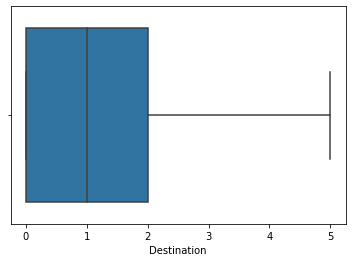

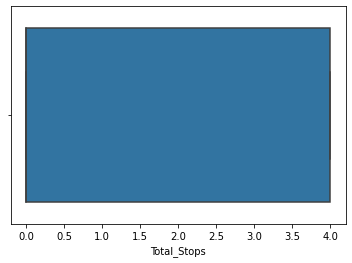

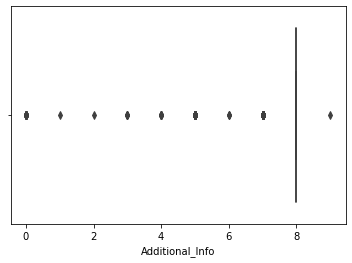

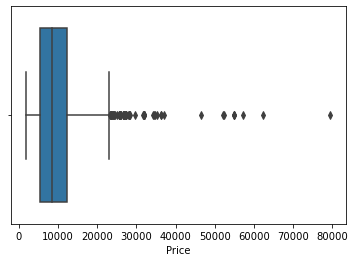

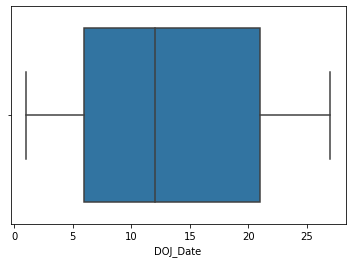

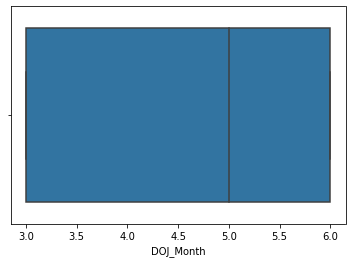

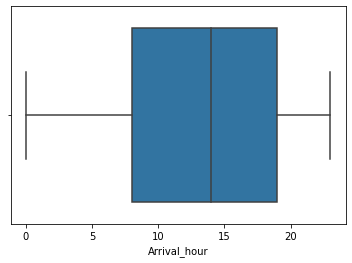

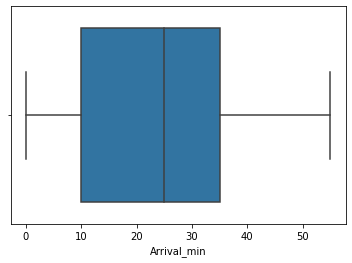

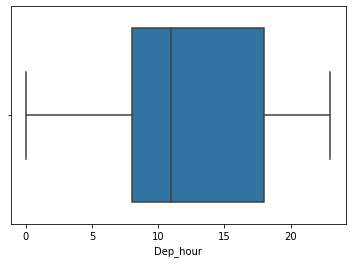

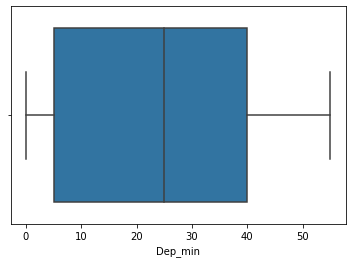

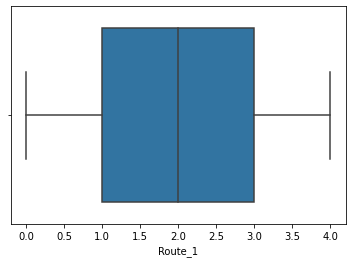

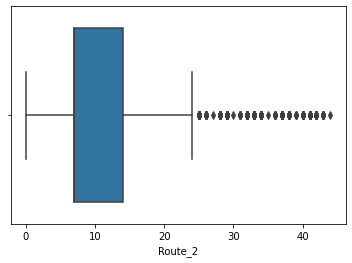

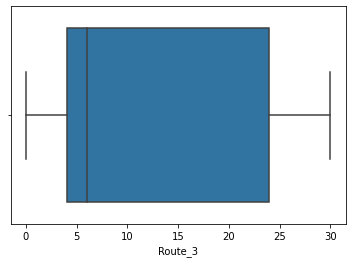

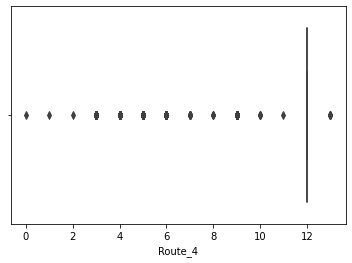

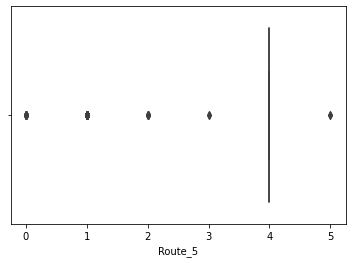

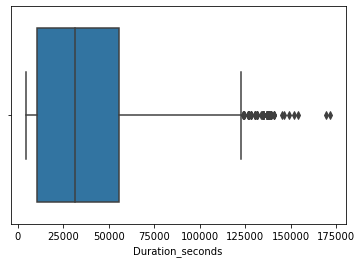

In [43]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

## ML Model Development

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DOJ_Date,DOJ_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_seconds
0,3,0,5,4,8,3897.0,24,3,1,10,22,20,0,13,24,12,4,10200
1,1,3,0,1,8,7662.0,1,5,13,15,5,50,2,25,1,3,4,26700
2,4,2,1,1,8,13882.0,9,6,4,25,9,25,3,32,4,5,4,68400
3,3,3,0,0,8,6218.0,12,5,23,30,18,5,2,34,3,12,4,19500
4,3,0,5,0,8,13302.0,1,3,21,35,16,50,0,34,8,12,4,17100


In [45]:
df_train=df[0:10682]
df_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,DOJ_Date,DOJ_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_seconds
0,3,0,5,4,8,3897.0,24,3,1,10,22,20,0,13,24,12,4,10200
1,1,3,0,1,8,7662.0,1,5,13,15,5,50,2,25,1,3,4,26700
2,4,2,1,1,8,13882.0,9,6,4,25,9,25,3,32,4,5,4,68400
3,3,3,0,0,8,6218.0,12,5,23,30,18,5,2,34,3,12,4,19500
4,3,0,5,0,8,13302.0,1,3,21,35,16,50,0,34,8,12,4,17100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107.0,9,4,22,25,19,55,2,5,24,12,4,9000
10679,1,3,0,4,8,4145.0,27,4,23,20,20,45,2,5,24,12,4,9300
10680,4,0,2,4,8,7229.0,27,4,11,20,8,20,0,13,24,12,4,10800
10681,10,0,5,4,8,12648.0,1,3,14,10,11,30,0,13,24,12,4,9600


In [46]:
df_test=df[10682:]
df_test.drop('Price',axis=1,inplace=True)

In [47]:
df_train.shape, df_test.shape

((10682, 18), (2671, 17))

In [48]:
df_train['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [51]:
x=df_train.drop('Price',axis=1)
y=df_train['Price']

#Finding best random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=LR.score(x_train,y_train)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.5164030545964526 on random state  121


**Building the model**

Let's try different algorithms and find out the accuracy for each model. We will also consider the cross validation score to check if the accuracy is due to overfitting.

The model with high accuracy and low difference between accuracy score and cross validation score will be considered as the best fit model.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=121)

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

model_reg = [RandomForestRegressor(), SVR(), DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(normalize=True),Ridge(alpha=0.05,normalize=True)]
df_result=pd.DataFrame(columns=['Model','Score','Mean Absolute Error','RMSE','R2 Score'])


for model in model_reg:
    m = model
    test_string=str(m)
    spl_word='('
    print('Model: ',m)
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    acc=m.score(x_train,y_train)
    acc_final=acc
    print('Score: ', acc_final)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    r2_scr=r2_score(y_test,pred)
    #scr=cross_val_score(m,x,y,cv=5,scoring)
    #scr=np.sqrt(np.abs(scr['test_score']))
    #scr_final=np.mean(scr)
    #scr_final=scr.mean()
    print('RMSEe: ',rmse)
    #diff=(acc_final-scr_final)
    mean_abs_error=mae(y_test,pred)
    #print('Difference between cross validation score and accuracy is ', diff)
    print('------------------------------------------------')
    df_result=df_result.append({'Model':test_string,'Score':acc_final,'Mean Absolute Error':mean_abs_error,'RMSE':rmse,'R2 Score':r2_scr}, ignore_index=True)

print(df_result)
    

Model:  RandomForestRegressor()
Score:  0.980312891769014
RMSEe:  2237.8827777678907
------------------------------------------------
Model:  SVR()
Score:  0.15442757274169316
RMSEe:  4766.059638085092
------------------------------------------------
Model:  DecisionTreeRegressor()
Score:  0.9960836083890946
RMSEe:  2860.368960520231
------------------------------------------------
Model:  KNeighborsRegressor()
Score:  0.7274581134173493
RMSEe:  3828.2925710104378
------------------------------------------------
Model:  LinearRegression(normalize=True)
Score:  0.5164030545964526
RMSEe:  3614.9177746166984
------------------------------------------------
Model:  Ridge(alpha=0.05, normalize=True)
Score:  0.5152570882511938
RMSEe:  3614.8050419707615
------------------------------------------------
                               Model     Score  Mean Absolute Error  \
0            RandomForestRegressor()  0.980313           708.475650   
1                              SVR()  0.154428     

In [53]:
df_result

,Model,Score,Mean Absolute Error,RMSE,R2 Score
0,RandomForestRegressor(),0.980313,708.475650,2237.882778,0.842758
1,SVR(),0.154428,3135.796494,4766.059638,0.120650
2,DecisionTreeRegressor(),0.996084,755.485543,2860.368961,0.782636
3,KNeighborsRegressor(),0.727458,1833.321934,3828.292571,0.491715
4,LinearRegression(normalize=True),0.516403,2378.379450,3614.917775,0.447426
5,"Ridge(alpha=0.05, normalize=True)",0.515257,2376.790558,3614.805042,0.445250


We can say that Random Forest Regressor is the best fit model for our problem. The accuracy score is good with good R2 score.
R2 score indicates the performance of the model and the best possible value for R2 score is 1.

**Saving the best fit model**

In [54]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9797794281467518

In [55]:
y_pred = rf.predict(x_test)

In [56]:
print("Predicted result: ",y_pred)
print("Actual result : ", y_test)

Predicted result:  [ 4956.75        6603.14       13006.38666667 ... 10965.05
  4680.21       10672.64      ]
Actual result :  4299     4878.0
7005     6818.0
9060     8073.0
1833    13941.0
9851     5911.0
         ...   
5883     3807.0
5176     5678.0
8135    10975.0
9699     4963.0
1249    10844.0
Name: Price, Length: 3205, dtype: float64


In [57]:
print("Error : ")

# MAE is the sum of absolute differences between our target and predicted variables. 
# So it measures the average magnitude of errors in a set of predictions, without considering their directions. 
print('Mean absolute error : ', mean_absolute_error(y_test,y_pred))

# MSE(Mean Squared Error) is the sum of squared distances between our target variable and predicted values.
print('Mean squared error : ', mean_squared_error(y_test,y_pred))

# Residuals are a measure of how far from the regression line data points are
print('Root mean squared error : ', np.sqrt(mean_squared_error(y_test,y_pred)))

Error : 
Mean absolute error :  702.0564173798381
Mean squared error :  3724515.8828342645
Root mean squared error :  1929.9004852153037


## Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

parameters={
 'bootstrap': [True],
 'max_depth': [100,80],
 'max_features': [3,5,20],
 'min_samples_leaf': [3,5],
 'min_samples_split': [10,15,30],
 'n_estimators': [100,300,500]
}

GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

GCV.fit(x_train,y_train)

GCV.best_params_ #printing the best parameters found by GridSearchCV

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [59]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [60]:
GCV.score(x_train,y_train)

0.9152994560358299

**Saving the final model**

In [61]:
rf = RandomForestRegressor(bootstrap=True,max_depth=100,max_features= 5,min_samples_leaf=3,min_samples_split=10,n_estimators=500)
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9149208755702282

In [72]:
pred_test=pd.DataFrame(rf.predict(df_test),columns=['Price'])
pred_test

,Price
0,14511.741930
1,4354.126479
2,12680.621286
3,10339.404156
4,4189.002137
...,...
2666,9760.257248
2667,5035.741816
2668,15865.728618
2669,13351.170407


In [73]:
# Saving the prediction for test dataset

pred_test.to_csv('submission.csv')

In [74]:
import joblib
joblib.dump(rf,'Flight Price.obj')

['Flight Price.obj']